## Description:

   Use Deseq2 to identify responders at different taxa levels


# Setting variables

In [1]:
workDir = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/DeSeq2/'
#using physeq file with sparsity of greater than 3 in 3 samples
physeqFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3'

# Init

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(phyloseq)
library(ggplot2)
library(foreach)
library(DESeq2)
library(BiocParallel)
library(doParallel)
library(gridExtra)
library(dplyr)
library(tidyr)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Use suppressPackageStartupMessages() to eliminate package startup
messages.

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: S4Vectors

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: stats4

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserW

In [4]:
%%R
register(MulticoreParam(20))

# Loading phyloseq object

In [5]:
%%R -i physeqFile

physeq.Full = readRDS(physeqFile)
physeq.Full

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [6]:
%%R
colnames(tax_table(physeq.Full)) = c("Kingdom" ,"Phylum"  ,"Class",   "Order",   "Family",  "Genus" ,  "Species", "Rank8")

# Merge taxa at different branch lengths

In [8]:
%%R
# physeq.tipg = tip_glom(physeq.Full, h = 0.05)
# physeq.tipg

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2950 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 2950 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2950 tips and 2949 internal nodes ]


In [13]:
%%R -i workDir
# outFile = file.path("/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/FullSparsity3-3_merged05")
# saveRDS(physeq.tipg, outFile)

In [9]:
%%R
# physeq.tipg1 = tip_glom(physeq.Full, h = 0.1)
# physeq.tipg1

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1448 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 1448 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1448 tips and 1447 internal nodes ]


In [14]:
%%R -i workDir
# outFile = file.path("/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/FullSparsity3-3_merged1")
# saveRDS(physeq.tipg1, outFile)

In [10]:
%%R
# physeq.tipg2 = tip_glom(physeq.Full, h = 0.2)
# physeq.tipg2

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 575 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 575 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 575 tips and 574 internal nodes ]


In [15]:
%%R -i workDir
# outFile = file.path("/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/FullSparsity3-3_merged2")
# saveRDS(physeq.tipg2, outFile)

In [11]:
%%R
# physeq.tipg3 = tip_glom(physeq.Full, h = 0.3)
# physeq.tipg3

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 294 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 294 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 294 tips and 293 internal nodes ]


In [16]:
%%R -i workDir
# outFile = file.path("/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/FullSparsity3-3_merged3")
# saveRDS(physeq.tipg3, outFile)

# Checkpoint read in merged files and continue from here

In [41]:
%%R
physeq.tip.05 = readRDS("/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/FullSparsity3-3_merged05")
physeq.tip.1 = readRDS("/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/FullSparsity3-3_merged1")
physeq.tip.2 = readRDS("/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/FullSparsity3-3_merged2")
physeq.tip.3 = readRDS("/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/FullSparsity3-3_merged3")

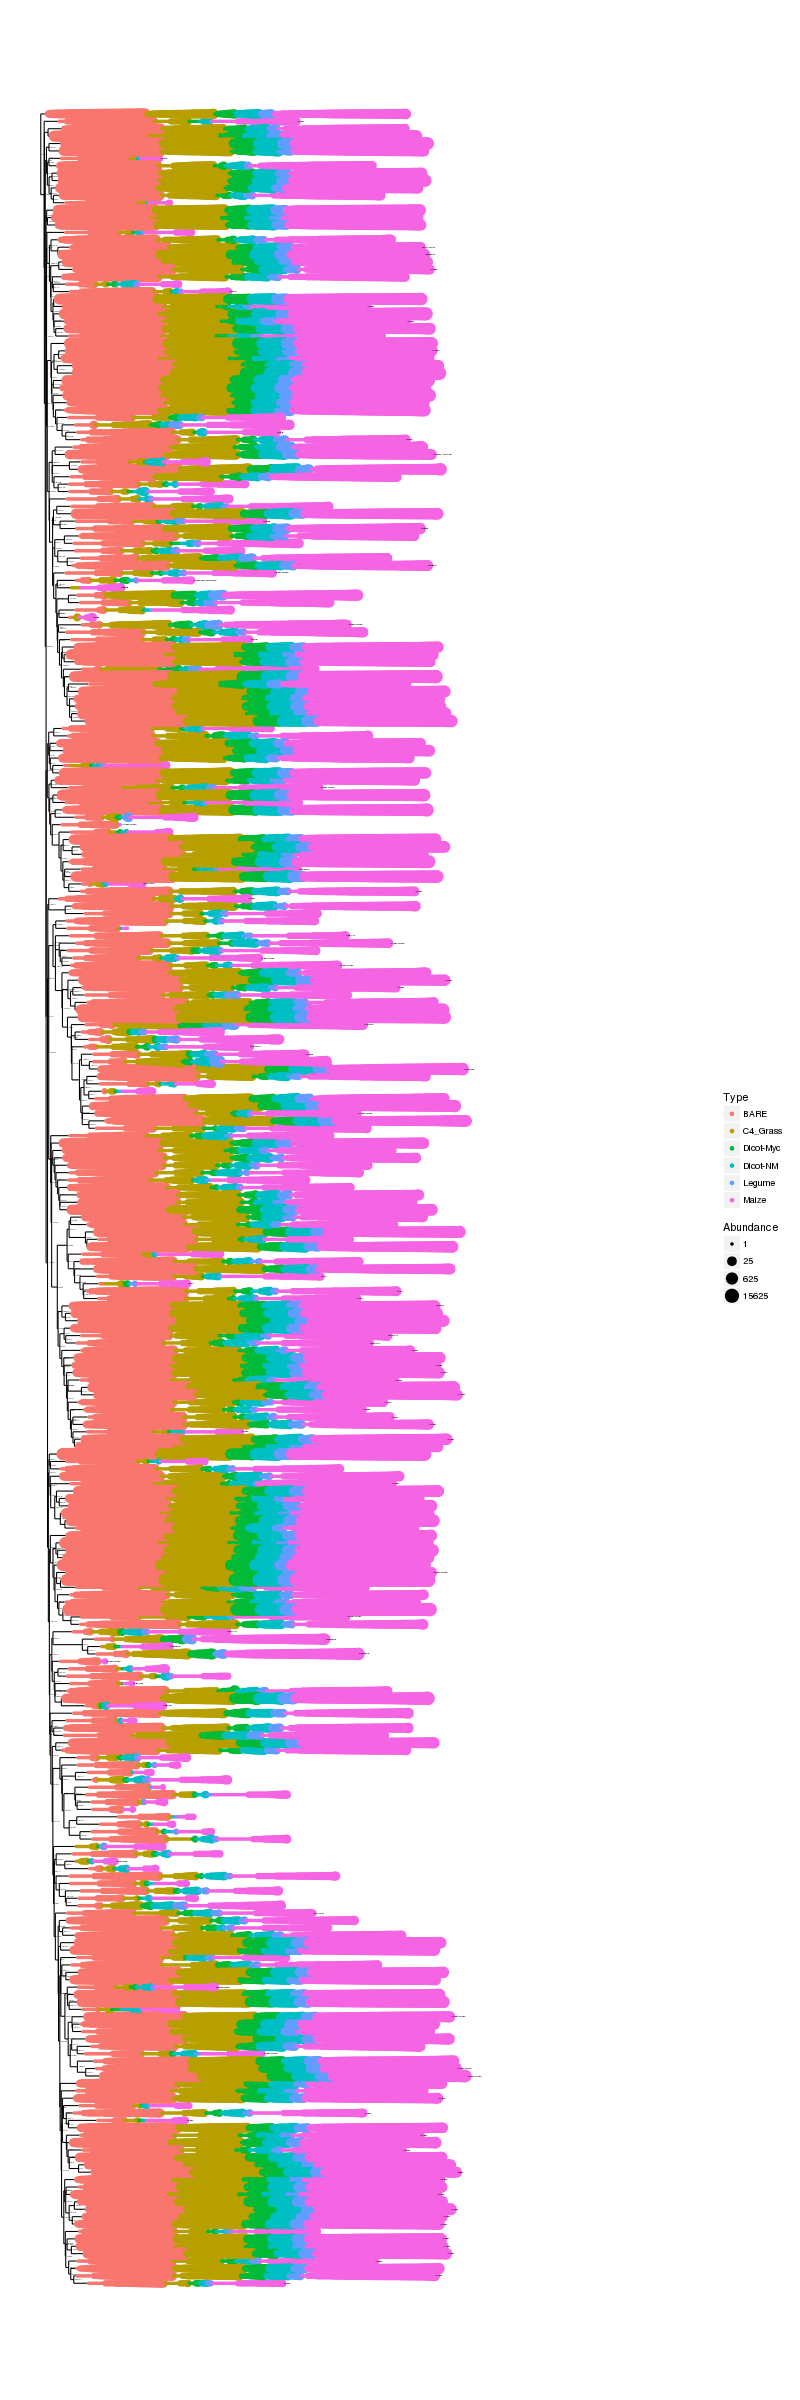

In [19]:
%%R -h 2400 -w 800
plot_tree(physeq.tipg3, color = "Type", label.tips = "Genus", 
          size = "abundance", plot.margin = 0.5, ladderize = TRUE)

In [42]:
%%R
# #0.05
#     #re-order levels 
#     sample_data(physeq.tip.05)$Plant = relevel(sample_data(physeq.tip.05)$Plant, "BARE")

#     #Set DAP as factor
#     sample_data(physeq.tip.05)$DAP = factor(sample_data(physeq.tip.05)$DAP) 
  

# #0.1
#     #re-order levels 
#     sample_data(physeq.tip.1)$Plant = relevel(sample_data(physeq.tip.1)$Plant, "BARE")

#     #Set DAP as factor
#     sample_data(physeq.tip.1)$DAP = factor(sample_data(physeq.tip.1)$DAP) 
    
   
# #0.2
#     #re-order levels 
#     sample_data(physeq.tip.2)$Plant = relevel(sample_data(physeq.tip.2)$Plant, "BARE")

#     #Set DAP as factor
#     sample_data(physeq.tip.2)$DAP = factor(sample_data(physeq.tip.2)$DAP) 
    
# #0.3
#     #re-order levels 
#     sample_data(physeq.tip.3)$Plant = relevel(sample_data(physeq.tip.3)$Plant, "BARE")

#     #Set DAP as factor
#     sample_data(physeq.tip.3)$DAP = factor(sample_data(physeq.tip.3)$DAP)

# Create DeSeq2 object

# Function generating plant log2fold change figure

In [24]:
%%R

asNumeric = function(x) { as.numeric(as.character(x)) }

get_Ps = function(physeq.obj) {
    diagdds = phyloseq_to_deseq2(physeq.obj, ~Plant)
    diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)
    theta = 0.5
    r = results(diagdds)
    beta = r$log2FoldChange
    betaSE = r$lfcSE
    p = pnorm(beta, theta, betaSE, lower.tail = FALSE)
    r$p = p
    return(r[, c("log2FoldChange", "p")])
}

#Function to trim physeq object to just samples to include in Deseq analysis
deseq_prune = function(physeq.obj, plant, day) {
    physeq.md = sample_data(physeq.obj)
    p = prune_samples((physeq.md$Plant %in% c("BARE", plant))&
                     (physeq.md$DAP == day), physeq.obj)
    p.thresh = filter_taxa(p, function(x) sum(x > 0) > 0, TRUE)
    return(p.thresh)
}


## 0.05 Tip glom loop through sampling dates to compare enrichment in rhizosphere to bare soil

In [25]:
%%R -w 1200 -h 600

# phy = physeq.tip.05

# Sd = sample_data(phy)

# days = levels(Sd$DAP)
# res.list = vector("list", length(days))
# names(res.list) = as.character(days)
# res.list

# df_all = data.frame()
# df_plant = data.frame()

# for (day in days) {
#     #print(day) ##need to remove
#     Sd.d = Sd[Sd$DAP == day,]
#     Sd.d = Sd.d[Sd.d$Plant != "BARE"]
#     Plants = levels(Sd.d$Plant) 
#     #Plants %>% print
    
#     res.list.list = NULL        
#     res.list.list = vector("list", length(Plants))
#     names(res.list) = Plants
    
    
#     for (plant in Plants) {
#         DF = NULL
        
#         #Trim physeq object by to day-plant combo 
#         physeq.plant = deseq_prune(phy, plant, day)
        
#         #re-order levels 
#         sample_data(physeq.plant)$Plant = relevel(sample_data(physeq.plant)$Plant, "BARE")
        
#         #convert to deseq using function above
#         DF = get_Ps(physeq.plant)
        
#         supp = tax_table(physeq.plant)
#             if (!setequal(row.names(DF), row.names(supp))) {
#             stop("Ordination and supplementary data indices differ on the following:\n.",
#             setdiff(row.names(DF), row.names(supp)))
#         }  
   
#         DF = data.frame(DF, supp)
#         DF$OTU = rownames(DF)
#         DF$Day = day
#         DF$Plant = plant
#         df_plant = rbind(df_plant, DF)     
#     }

# }
# df_all = df_plant  

In [29]:
%%R
# dim(df_all) %>% print
# Otu_sel = df_all$OTU == "OTU.5899"
# Otest = df_all[Otu_sel,]
# Otest

[1] 63404    13
 [1] <NA>                                          
 [2] uncultured_bacterium                          
 [3] uncultured_Verrucomicrobia_bacterium          
 [4] Candidatus                                    
 [5] uncultured_planctomycete                      
 [6] uncultured_Planctomycetales_bacterium         
 [7] uncultured_prokaryote                         
 [8] uncultured_Planctomyces_sp.                   
 [9] uncultured_Planctomycetaceae_bacterium        
[10] uncultured_Bacteroidetes_bacterium            
[11] Bacillus                                      
[12] Sphaerobacteraceae                            
[13] uncultured_Chloroflexi_bacterium              
[14] uncultured_Caldilinea_sp.                     
[15] uncultured_soil_bacterium                     
[16] uncultured_actinobacterium                    
[17] uncultured_Actinomycetales_bacterium          
[18] Anaeromyxobacter                              
[19] uncultured_delta_proteobacterium           

In [30]:
%%R -i workDir
# df_all$p.adj = p.adjust(df_all$p, "BH")
# setwd(workDir)
# write.table(df_all, "bare-plant-tip-05.csv", row.names = FALSE, sep = ",")

## 0.1 Tip glom loop through sampling dates to compare enrichment in rhizosphere to bare soil

In [31]:
%%R -w 1200 -h 600

# phy = physeq.tip.1

# Sd = sample_data(phy)

# days = levels(Sd$DAP)
# res.list = vector("list", length(days))
# names(res.list) = as.character(days)
# res.list

# df_all = data.frame()
# df_plant = data.frame()

# for (day in days) {
#     #print(day) ##need to remove
#     Sd.d = Sd[Sd$DAP == day,]
#     Sd.d = Sd.d[Sd.d$Plant != "BARE"]
#     Plants = levels(Sd.d$Plant) 
#     #Plants %>% print
    
#     res.list.list = NULL        
#     res.list.list = vector("list", length(Plants))
#     names(res.list) = Plants
    
    
#     for (plant in Plants) {
#         DF = NULL
        
#         #Trim physeq object by to day-plant combo 
#         physeq.plant = deseq_prune(phy, plant, day)
        
#         #re-order levels 
#         sample_data(physeq.plant)$Plant = relevel(sample_data(physeq.plant)$Plant, "BARE")
        
#         #convert to deseq using function above
#         DF = get_Ps(physeq.plant)
        
#         supp = tax_table(physeq.plant)
#             if (!setequal(row.names(DF), row.names(supp))) {
#             stop("Ordination and supplementary data indices differ on the following:\n.",
#             setdiff(row.names(DF), row.names(supp)))
#         }  
   
#         DF = data.frame(DF, supp)
#         DF$OTU = rownames(DF)
#         DF$Day = day
#         DF$Plant = plant
#         df_plant = rbind(df_plant, DF)     
#     }

# }
# df_all = df_plant  

In [33]:
%%R
dim(df_all) %>% print
Otu_sel = df_all$OTU == "OTU.5899"
Otest = df_all[Otu_sel,]
Otest

[1] 31309    13
           log2FoldChange          p  Kingdom        Phylum Class
OTU.5899       -1.1558629 0.94827234 Bacteria Acidobacteria 32-21
OTU.58991      -0.5090134 0.75089298 Bacteria Acidobacteria 32-21
OTU.58992       0.4946756 0.50138048 Bacteria Acidobacteria 32-21
OTU.58993      -0.4211565 0.74587131 Bacteria Acidobacteria 32-21
OTU.58994      -0.7354714 0.78838014 Bacteria Acidobacteria 32-21
OTU.58995       0.0762786 0.66014154 Bacteria Acidobacteria 32-21
OTU.58996      -0.4011156 0.81136445 Bacteria Acidobacteria 32-21
OTU.58997      -0.9675814 0.90048286 Bacteria Acidobacteria 32-21
OTU.58998      -1.6505206 0.96606674 Bacteria Acidobacteria 32-21
OTU.58999      -0.9181720 0.89708121 Bacteria Acidobacteria 32-21
OTU.589910     -1.8029794 0.97894364 Bacteria Acidobacteria 32-21
OTU.589911      2.2936071 0.02868157 Bacteria Acidobacteria 32-21
OTU.589912      0.9225574 0.35759795 Bacteria Acidobacteria 32-21
OTU.589913      0.5566254 0.48416370 Bacteria Acidobacteria 

In [34]:
%%R -i workDir
# df_all$p.adj = p.adjust(df_all$p, "BH")
# setwd(workDir)
# write.table(df_all, "bare-plant-tip-1.csv", row.names = FALSE, sep = ",")

## 0.2 Tip glom loop through sampling dates to compare enrichment in rhizosphere to bare soil

In [35]:
%%R -w 1200 -h 600

# phy = physeq.tip.2

# Sd = sample_data(phy)

# days = levels(Sd$DAP)
# res.list = vector("list", length(days))
# names(res.list) = as.character(days)
# res.list

# df_all = data.frame()
# df_plant = data.frame()

# for (day in days) {
#     #print(day) ##need to remove
#     Sd.d = Sd[Sd$DAP == day,]
#     Sd.d = Sd.d[Sd.d$Plant != "BARE"]
#     Plants = levels(Sd.d$Plant) 
#     #Plants %>% print
    
#     res.list.list = NULL        
#     res.list.list = vector("list", length(Plants))
#     names(res.list) = Plants
    
    
#     for (plant in Plants) {
#         DF = NULL
        
#         #Trim physeq object by to day-plant combo 
#         physeq.plant = deseq_prune(phy, plant, day)
        
#         #re-order levels 
#         sample_data(physeq.plant)$Plant = relevel(sample_data(physeq.plant)$Plant, "BARE")
        
#         #convert to deseq using function above
#         DF = get_Ps(physeq.plant)
        
#         supp = tax_table(physeq.plant)
#             if (!setequal(row.names(DF), row.names(supp))) {
#             stop("Ordination and supplementary data indices differ on the following:\n.",
#             setdiff(row.names(DF), row.names(supp)))
#         }  
   
#         DF = data.frame(DF, supp)
#         DF$OTU = rownames(DF)
#         DF$Day = day
#         DF$Plant = plant
#         df_plant = rbind(df_plant, DF)     
#     }

# }
# df_all = df_plant  

In [36]:
%%R
# dim(df_all) %>% print
# Otu_sel = df_all$OTU == "OTU.5899"
# Otest = df_all[Otu_sel,]
# Otest

[1] 12469    13
           log2FoldChange          p  Kingdom        Phylum Class
OTU.5899       -1.0917501 0.94976516 Bacteria Acidobacteria 32-21
OTU.58991      -0.4138098 0.73391993 Bacteria Acidobacteria 32-21
OTU.58992       0.6139815 0.47082362 Bacteria Acidobacteria 32-21
OTU.58993      -0.2165775 0.69313877 Bacteria Acidobacteria 32-21
OTU.58994      -0.6150101 0.76989996 Bacteria Acidobacteria 32-21
OTU.58995       0.1550583 0.63276820 Bacteria Acidobacteria 32-21
OTU.58996      -0.3826411 0.80604798 Bacteria Acidobacteria 32-21
OTU.58997      -0.9284593 0.89208945 Bacteria Acidobacteria 32-21
OTU.58998      -1.5298412 0.96220088 Bacteria Acidobacteria 32-21
OTU.58999      -0.9274331 0.89788975 Bacteria Acidobacteria 32-21
OTU.589910     -1.7330500 0.98030578 Bacteria Acidobacteria 32-21
OTU.589911      2.2465203 0.03356258 Bacteria Acidobacteria 32-21
OTU.589912      0.8813153 0.36761719 Bacteria Acidobacteria 32-21
OTU.589913      0.5707265 0.47940396 Bacteria Acidobacteria 

In [37]:
%%R -i workDir
# df_all$p.adj = p.adjust(df_all$p, "BH")
# setwd(workDir)
# write.table(df_all, "bare-plant-tip-2.csv", row.names = FALSE, sep = ",")

### 0.3 Tip glom loop through sampling dates to compare enrichment in rhizosphere to bare soil

In [43]:
%%R -w 1200 -h 600

phy = physeq.tip.3

Sd = sample_data(phy)

days = levels(Sd$DAP)
res.list = vector("list", length(days))
names(res.list) = as.character(days)
res.list

df_all = data.frame()
df_plant = data.frame()

for (day in days) {
    #print(day) ##need to remove
    Sd.d = Sd[Sd$DAP == day,]
    Sd.d = Sd.d[Sd.d$Plant != "BARE"]
    Plants = levels(Sd.d$Plant) 
    #Plants %>% print
    
    res.list.list = NULL        
    res.list.list = vector("list", length(Plants))
    names(res.list) = Plants
    
    
    for (plant in Plants) {
        DF = NULL
        
        #Trim physeq object by to day-plant combo 
        physeq.plant = deseq_prune(phy, plant, day)
        
        #re-order levels 
        sample_data(physeq.plant)$Plant = relevel(sample_data(physeq.plant)$Plant, "BARE")
        
        #convert to deseq using function above
        DF = get_Ps(physeq.plant)
        
        supp = tax_table(physeq.plant)
            if (!setequal(row.names(DF), row.names(supp))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  
   
        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)
        DF$Day = day
        DF$Plant = plant
        df_plant = rbind(df_plant, DF)     
    }

}
df_all = df_plant  

In [44]:
%%R
dim(df_all) %>% print
Otu_sel = df_all$OTU == "OTU.5899"
Otest = df_all[Otu_sel,]
Otest

[1] 6399   13
 [1] log2FoldChange p              Kingdom        Phylum         Class         
 [6] Order          Family         Genus          Species        Rank8         
[11] OTU            Day            Plant         
<0 rows> (or 0-length row.names)


In [46]:
%%R -i workDir
df_all$p.adj = p.adjust(df_all$p, "BH")
setwd(workDir)
write.table(df_all, "bare-plant-tip-3.csv", row.names = FALSE, sep = ",")

# Checkpoint, read files to continue

In [5]:
%%R -i workDir
setwd(workDir)
bp.tip05 = read.csv("bare-plant-tip-05.csv", header = TRUE)
bp.tip1 = read.csv("bare-plant-tip-1.csv", header = TRUE)
bp.tip2 = read.csv("bare-plant-tip-2.csv", header = TRUE)
bp.tip3 = read.csv("bare-plant-tip-3.csv", header = TRUE)
head(bp.tip3)

  log2FoldChange         p  Kingdom                 Phylum                Class
1    -0.82302335 0.9999994 Bacteria          Acidobacteria                 <NA>
2    -1.87324725 0.9999986 Bacteria         Proteobacteria  Deltaproteobacteria
3    -1.27682440 1.0000000 Bacteria          Acidobacteria                 <NA>
4    -0.08359112 0.9729461 Bacteria          Acidobacteria                 S035
5    -1.70123898 0.9878888 Bacteria Candidate_division_WS3 uncultured_bacterium
6    -2.61735320 1.0000000 Bacteria Candidate_division_WS3                 <NA>
                 Order         Family      Genus Species Rank8      OTU Day
1                 <NA>           <NA>       <NA>    <NA>  <NA>  OTU.323  36
2    Desulfobacterales Nitrospinaceae uncultured    <NA>  <NA> OTU.1030  36
3                 <NA>           <NA>       <NA>    <NA>  <NA>   OTU.44  36
4 uncultured_bacterium           <NA>       <NA>    <NA>  <NA>  OTU.791  36
5                 <NA>           <NA>       <NA>    <NA>  <N

# Core microbiomes at different levels of organization

## tip.3

In [19]:
%%R
#filter to only significant responders
bp.tip3.sig = filter(bp.tip3, p.adj < 0.05)

#Spread by plant to matrix of l2f by each OTU*Plant combo

df = bp.tip3.sig[,c(1,11,13)]
l2f_m = spread(df, Plant, log2FoldChange, fill = 0, drop = TRUE)

#Make into matrix

    matrix.please<-function(x) {
        m<-as.matrix(x[,-1])
        rownames(m)<-x[,1]
        m
    }
    l2f_mat = matrix.please(l2f_m)
    print("Number of responders")
    dim(l2f_mat)[1] %>% print

#How many core taxa?
    rc_sel = apply(l2f_mat, 1, function (x) min(x) > 0)
    l2f_rhizcore = l2f_mat[rc_sel,]    

    print("Core - All Plants")    
    dim(l2f_rhizcore)[1]  %>% print

#How many core taxa in maize
    maize_mat = l2f_mat[,c("75-062", "B73", "B97", "H99","Hp301",  "Il14H",  "Ki3", "Mo18", "MS71", 
                           "Oh7B", "Tx303")] 

    c_sel = apply(maize_mat, 1,function (x) min(x) > 0)

    l2f_maizecore = maize_mat[c_sel,]    
    print("Core - Maize") 
    dim(l2f_maizecore)[1] %>% print 

#How many core in C4 grasses
    C4.nm_mat = l2f_mat[,c("ECHCG",  "ELCOR",  "ERATE", "SETFA",  "SORBI",  "SORSUD")] 

    c_sel = apply(C4.nm_mat, 1,function (x) min(x) > 0)
   
    l2f_C4.nmcore = C4.nm_mat[c_sel,]    
    print("Core - C4grass")
    dim(l2f_C4.nmcore)[1]  %>% print 
        
#How many core in maize + C4 grasses
    C4_mat = l2f_mat[,c("75-062", "B73", "B97", "H99","Hp301",  "Il14H",  "Ki3", "Mo18", "MS71", 
                       "Oh7B", "Tx303", "ECHCG",  "ELCOR",  "ERATE", "SETFA",  "SORBI",  "SORSUD")] 

    c_sel = apply(C4_mat, 1,function (x) min(x) > 0)
   
    l2f_C4core = C4_mat[c_sel,]    
    print("Core - C4grass and Maize")
    dim(l2f_C4core)[1] %>% print
        
 # Core dicots       
    Dicot_mat = l2f_mat[,c("AMAPO", "ABUTH", "FAGES", "HELAN", "GLYMA")] 

    c_sel = apply(Dicot_mat, 1,function (x) min(x) > 0)
   
    l2f_Dicotcore = Dicot_mat[c_sel,] 
    print("Core - Dicots")
    dim(l2f_Dicotcore)[1] %>% print      


[1] "Number of responders"
[1] 128
[1] "Core - All Plants"
[1] 6
[1] "Core - Maize"
[1] 19
[1] "Core - C4grass"
[1] 19
[1] "Core - C4grass and Maize"
[1] 12
[1] "Core - Dicots"
[1] 14


## tip.2

In [22]:
%%R
#filter to only significant responders
bp.tip2.sig = filter(bp.tip2, p.adj < 0.05)

#Spread by plant to matrix of l2f by each OTU*Plant combo

df = bp.tip2.sig[,c(1,11,13)]
l2f_m = spread(df, Plant, log2FoldChange, fill = 0, drop = TRUE)

#Make into matrix

    matrix.please<-function(x) {
        m<-as.matrix(x[,-1])
        rownames(m)<-x[,1]
        m
    }
    l2f_mat = matrix.please(l2f_m)
    print("Number of responders")
    dim(l2f_mat)[1] %>% print

#How many core taxa?
    rc_sel = apply(l2f_mat, 1, function (x) min(x) > 0)
    l2f_rhizcore = l2f_mat[rc_sel,]    

    print("Core - All Plants")    
    dim(l2f_rhizcore)[1]  %>% print

#How many core taxa in maize
    maize_mat = l2f_mat[,c("75-062", "B73", "B97", "H99","Hp301",  "Il14H",  "Ki3", "Mo18", "MS71", 
                           "Oh7B", "Tx303")] 

    c_sel = apply(maize_mat, 1,function (x) min(x) > 0)

    l2f_maizecore = maize_mat[c_sel,]    
    print("Core - Maize") 
    dim(l2f_maizecore)[1] %>% print 

#How many core in C4 grasses
    C4.nm_mat = l2f_mat[,c("ECHCG",  "ELCOR",  "ERATE", "SETFA",  "SORBI",  "SORSUD")] 

    c_sel = apply(C4.nm_mat, 1,function (x) min(x) > 0)
   
    l2f_C4.nmcore = C4.nm_mat[c_sel,]    
    print("Core - C4grass")
    dim(l2f_C4.nmcore)[1]  %>% print 
        
#How many core in maize + C4 grasses
    C4_mat = l2f_mat[,c("75-062", "B73", "B97", "H99","Hp301",  "Il14H",  "Ki3", "Mo18", "MS71", 
                       "Oh7B", "Tx303", "ECHCG",  "ELCOR",  "ERATE", "SETFA",  "SORBI",  "SORSUD")] 

    c_sel = apply(C4_mat, 1,function (x) min(x) > 0)
   
    l2f_C4core = C4_mat[c_sel,]    
    print("Core - C4grass and Maize")
    dim(l2f_C4core)[1] %>% print
        
 # Core dicots       
    Dicot_mat = l2f_mat[,c("AMAPO", "ABUTH", "FAGES", "HELAN", "GLYMA")] 

    c_sel = apply(Dicot_mat, 1,function (x) min(x) > 0)
   
    l2f_Dicotcore = Dicot_mat[c_sel,] 
    print("Core - Dicots")
    dim(l2f_Dicotcore)[1] %>% print  

[1] "Number of responders"
[1] 248
[1] "Core - All Plants"
[1] 11
[1] "Core - Maize"
[1] 33
[1] "Core - C4grass"
[1] 29
[1] "Core - C4grass and Maize"
[1] 19
[1] "Core - Dicots"
[1] 19


## tip.1

In [23]:
%%R
#filter to only significant responders
bp.tip1.sig = filter(bp.tip1, p.adj < 0.05)

#Spread by plant to matrix of l2f by each OTU*Plant combo

df = bp.tip1.sig[,c(1,11,13)]
l2f_m = spread(df, Plant, log2FoldChange, fill = 0, drop = TRUE)

#Make into matrix

    matrix.please<-function(x) {
        m<-as.matrix(x[,-1])
        rownames(m)<-x[,1]
        m
    }
    l2f_mat = matrix.please(l2f_m)
    print("Number of responders")
    dim(l2f_mat)[1] %>% print

#How many core taxa?
    rc_sel = apply(l2f_mat, 1, function (x) min(x) > 0)
    l2f_rhizcore = l2f_mat[rc_sel,]    

    print("Core - All Plants")    
    dim(l2f_rhizcore)[1]  %>% print

#How many core taxa in maize
    maize_mat = l2f_mat[,c("75-062", "B73", "B97", "H99","Hp301",  "Il14H",  "Ki3", "Mo18", "MS71", 
                           "Oh7B", "Tx303")] 

    c_sel = apply(maize_mat, 1,function (x) min(x) > 0)

    l2f_maizecore = maize_mat[c_sel,]    
    print("Core - Maize") 
    dim(l2f_maizecore)[1] %>% print 

#How many core in C4 grasses
    C4.nm_mat = l2f_mat[,c("ECHCG",  "ELCOR",  "ERATE", "SETFA",  "SORBI",  "SORSUD")] 

    c_sel = apply(C4.nm_mat, 1,function (x) min(x) > 0)
   
    l2f_C4.nmcore = C4.nm_mat[c_sel,]    
    print("Core - C4grass")
    dim(l2f_C4.nmcore)[1]  %>% print 
        
#How many core in maize + C4 grasses
    C4_mat = l2f_mat[,c("75-062", "B73", "B97", "H99","Hp301",  "Il14H",  "Ki3", "Mo18", "MS71", 
                       "Oh7B", "Tx303", "ECHCG",  "ELCOR",  "ERATE", "SETFA",  "SORBI",  "SORSUD")] 

    c_sel = apply(C4_mat, 1,function (x) min(x) > 0)
   
    l2f_C4core = C4_mat[c_sel,]    
    print("Core - C4grass and Maize")
    dim(l2f_C4core)[1] %>% print
        
 # Core dicots       
    Dicot_mat = l2f_mat[,c("AMAPO", "ABUTH", "FAGES", "HELAN", "GLYMA")] 

    c_sel = apply(Dicot_mat, 1,function (x) min(x) > 0)
   
    l2f_Dicotcore = Dicot_mat[c_sel,] 
    print("Core - Dicots")
    dim(l2f_Dicotcore)[1] %>% print  

[1] "Number of responders"
[1] 524
[1] "Core - All Plants"
[1] 18
[1] "Core - Maize"
[1] 50
[1] "Core - C4grass"
[1] 39
[1] "Core - C4grass and Maize"
[1] 30
[1] "Core - Dicots"
[1] 28


## tip.05

In [24]:
%%R
#filter to only significant responders
bp.tip05.sig = filter(bp.tip05, p.adj < 0.05)

#Spread by plant to matrix of l2f by each OTU*Plant combo

df = bp.tip05.sig[,c(1,11,13)]
l2f_m = spread(df, Plant, log2FoldChange, fill = 0, drop = TRUE)

#Make into matrix

    matrix.please<-function(x) {
        m<-as.matrix(x[,-1])
        rownames(m)<-x[,1]
        m
    }
    l2f_mat = matrix.please(l2f_m)
    print("Number of responders")
    dim(l2f_mat)[1] %>% print

#How many core taxa?
    rc_sel = apply(l2f_mat, 1, function (x) min(x) > 0)
    l2f_rhizcore = l2f_mat[rc_sel,]    

    print("Core - All Plants")    
    dim(l2f_rhizcore)[1]  %>% print

#How many core taxa in maize
    maize_mat = l2f_mat[,c("75-062", "B73", "B97", "H99","Hp301",  "Il14H",  "Ki3", "Mo18", "MS71", 
                           "Oh7B", "Tx303")] 

    c_sel = apply(maize_mat, 1,function (x) min(x) > 0)

    l2f_maizecore = maize_mat[c_sel,]    
    print("Core - Maize") 
    dim(l2f_maizecore)[1] %>% print 

#How many core in C4 grasses
    C4.nm_mat = l2f_mat[,c("ECHCG",  "ELCOR",  "ERATE", "SETFA",  "SORBI",  "SORSUD")] 

    c_sel = apply(C4.nm_mat, 1,function (x) min(x) > 0)
   
    l2f_C4.nmcore = C4.nm_mat[c_sel,]    
    print("Core - C4grass")
    dim(l2f_C4.nmcore)[1]  %>% print 
        
#How many core in maize + C4 grasses
    C4_mat = l2f_mat[,c("75-062", "B73", "B97", "H99","Hp301",  "Il14H",  "Ki3", "Mo18", "MS71", 
                       "Oh7B", "Tx303", "ECHCG",  "ELCOR",  "ERATE", "SETFA",  "SORBI",  "SORSUD")] 

    c_sel = apply(C4_mat, 1,function (x) min(x) > 0)
   
    l2f_C4core = C4_mat[c_sel,]    
    print("Core - C4grass and Maize")
    dim(l2f_C4core)[1] %>% print
        
 # Core dicots       
    Dicot_mat = l2f_mat[,c("AMAPO", "ABUTH", "FAGES", "HELAN", "GLYMA")] 

    c_sel = apply(Dicot_mat, 1,function (x) min(x) > 0)
   
    l2f_Dicotcore = Dicot_mat[c_sel,] 
    print("Core - Dicots")
    dim(l2f_Dicotcore)[1] %>% print  

[1] "Number of responders"
[1] 968
[1] "Core - All Plants"
[1] 24
[1] "Core - Maize"
[1] 81
[1] "Core - C4grass"
[1] 56
[1] "Core - C4grass and Maize"
[1] 40
[1] "Core - Dicots"
[1] 43


# consenTRAIT


### Inputs:
* Need trait table with tab delimited text file with names of each taxon in the first column and then 0 or 1 values for each trait in the following columns (and no headers)
* Newick tree format with all taxon

In [38]:
%%R
treeFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/fasttree/otusn.tree'

df_all = read.csv("bare-plant.csv", header = TRUE)
## Create table from DeSeq output of responders in at least one genotype
## Start with df_all above, group by OTU
Tbl = df_all %>% group_by(OTU) %>% 
    summarise(pVal = min(p.adj)) 

Tbl$Responder = ifelse(Tbl$pVal < 0.05, 1,  0)
Tbl = Tbl[,-2]
head(Tbl)
write.table(Tbl, "/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/DeSeq2/Responders.txt", row.names = FALSE, col.names = FALSE, sep = "\t")

In [39]:
%%R
RespFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/DeSeq2/Responders.txt'

In [45]:
%%R

Rscript #--e consenTRAIT.R treeFile RespFile


Error in withVisible({ : object 'Rscript' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in withVisible({ : object 'Rscript' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)
